In [3]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import utils
import pandas as pd
from sklearn.metrics import classification_report,confusion_matrix
from tensorflow.keras.preprocessing import image

In [ ]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [4]:
X_train.shape


(60000, 28, 28)

In [6]:
X_test.shape

(10000, 28, 28)

In [7]:
single_image= X_train[0]
single_image.shape

(28, 28)

SELVAMUTHU KUMARAN V
212222040151


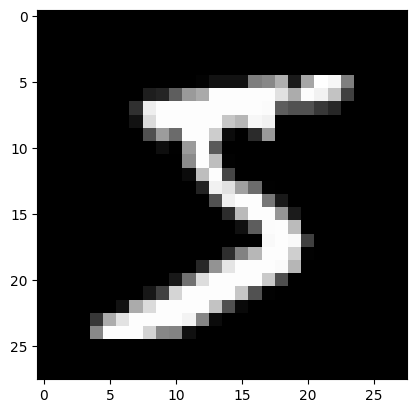

In [8]:
plt.imshow(single_image,cmap='gray')
print("SELVAMUTHU KUMARAN V")
print("212222040151")

In [9]:
y_train.shape

(60000,)

In [10]:
X_train.min()

0

In [11]:
X_train.max()


255

In [12]:
X_train_scaled = X_train/255.0
X_test_scaled = X_test/255.0

In [13]:
X_train_scaled.min()


0.0

In [14]:
X_train_scaled.max()

1.0

In [15]:
y_train[0]


5

In [16]:
y_train_onehot = utils.to_categorical(y_train,10)
y_test_onehot = utils.to_categorical(y_test,10)
type(y_train_onehot)
y_train_onehot.shape



(60000, 10)

SELVAMUTHU KUMARAN V
212222040151


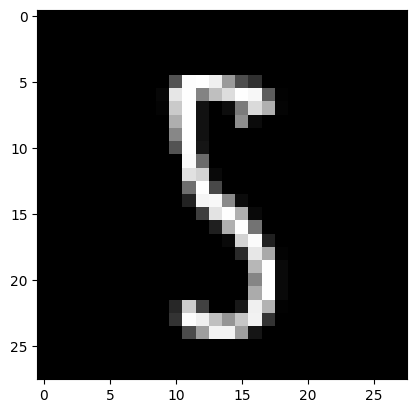

In [24]:
single_image = X_train[502]
plt.imshow(single_image,cmap='gray')
print("SELVAMUTHU KUMARAN V")
print("212222040151")

In [25]:
y_train_onehot[502]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.])

In [26]:
X_train_scaled = X_train_scaled.reshape(-1,28,28,1)
X_test_scaled = X_test_scaled.reshape(-1,28,28,1)

In [27]:
model = keras.Sequential()
inputs1=keras.Input(shape=(28,28,1))
model.add(inputs1)
model.add(layers.Conv2D(filters=32,kernel_size=(3,3),activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Flatten())
model.add(layers.Dense(32,activation='relu'))
model.add(layers.Dense(15,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 32)                  │         173,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 15)                  │             495 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │             160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 174,063 (679.93 KB)

 Trainable params: 174,063 (679.93 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:

model.fit(X_train_scaled ,y_train_onehot, epochs=6,batch_size=64,validation_data=(X_test_scaled,y_test_onehot))
metrics = pd.DataFrame(model.history.history)


Epoch 1/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 33s 34ms/step - accuracy: 0.8223 - loss: 0.5984 - val_accuracy: 0.9689 - val_loss: 0.1062
Epoch 2/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9709 - loss: 0.0995 - val_accuracy: 0.9783 - val_loss: 0.0678
Epoch 3/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 44s 31ms/step - accuracy: 0.9813 - loss: 0.0614 - val_accuracy: 0.9796 - val_loss: 0.0656
Epoch 4/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - accuracy: 0.9865 - loss: 0.0469 - val_accuracy: 0.9813 - val_loss: 0.0575
Epoch 5/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 29s 30ms/step - accuracy: 0.9893 - loss: 0.0368 - val_accuracy: 0.9852 - val_loss: 0.0477
Epoch 6/6
938/938 ━━━━━━━━━━━━━━━━━━━━ 45s 48ms/step - accuracy: 0.9908 - loss: 0.0297 - val_accuracy: 0.9845 - val_loss: 0.0487


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Name:SELVAMUTHU KUMARAN V
Reg no:212222040151
[[ 974    0    1    0    0    1    1    2    1    0]
 [   1 1130    0    1    1    0    0    0    2    0]
 [   3    5  999    3    3    0    1   11    7    0]
 [   0    0    1  996    0    4    0    3    3    3]
 [   0    0    0    0  975    0    0    1    1    5]
 [   1    0    0    4    0  882    2    0    2    1]
 [   6    2    0    0    4    6  938    0    2    0]
 [   0    2    7    1    0    0    0 1015    1    2]
 [   2    0    2    0    2    0    0    3  961    4]
 [   1    0    0    1   13    5    0    8    6  975]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.97      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.98      0.99      0.98       982
           5       0.98      0.99      0.99       892
   

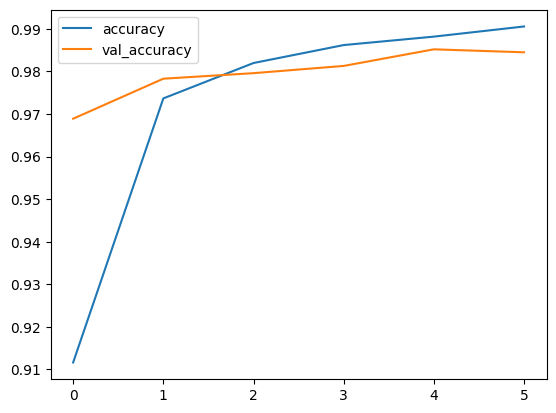

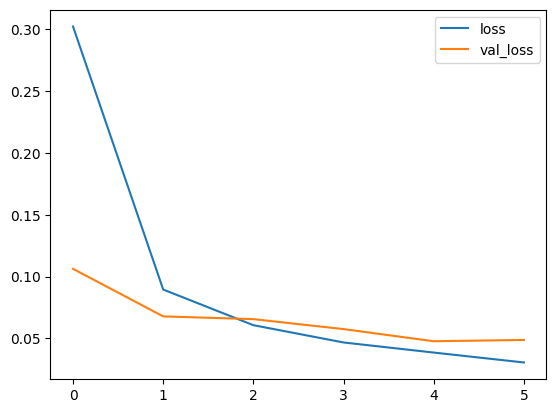

In [29]:
metrics.head()
metrics[['accuracy','val_accuracy']].plot()
metrics[['loss','val_loss']].plot()
x_test_predictions = np.argmax(model.predict(X_test_scaled), axis=1)
print("Name:SELVAMUTHU KUMARAN V")
print("Reg no:212222040151")
print(confusion_matrix(y_test,x_test_predictions))
print(classification_report(y_test,x_test_predictions))

In [36]:
img = image.load_img('/content/NO3.jpeg')

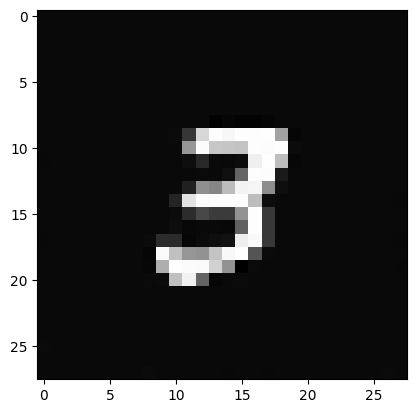

In [43]:
img_tensor = tf.convert_to_tensor(np.asarray(img))
img_28 = tf.image.resize(img_tensor,(28,28))
img_28_gray = tf.image.rgb_to_grayscale(img_28)
img_28_gray_scaled = img_28_gray.numpy()/255.0
plt.imshow(img_28_gray_scaled.reshape(28,28),cmap='gray')

In [42]:
print(x_single_prediction)

[3]


In [44]:
x_single_prediction = np.argmax(model.predict(img_28_gray_scaled.reshape(1,28,28,1)),axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
